In [1]:
from google.colab import drive
drive.mount('/drive')
 
#Optional: move to the desired location:
%cd /drive/My Drive/500

Mounted at /drive
/drive/My Drive/500


In [2]:
from sklearn.preprocessing import LabelEncoder
# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd 
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os
import _pickle as cPickle
from sklearn.metrics import accuracy_score
from skimage.filters import threshold_otsu
import pickle
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

from skimage import color, data, restoration

# from scipy.signal import convolve2d as conv2

from scipy.misc import face
from scipy.signal.signaltools import wiener
import matplotlib.pyplot as plt
import numpy as np

from scipy import ndimage
from scipy.stats import skew
from scipy.stats import kurtosis
import csv

In [3]:
def get_denoising(image):
    

    # resizing = cv2.resize(image, (224, 224)) 
    gray = cv2.cvtColor(resizing, cv2.COLOR_BGR2GRAY)


    gauss =gray.astype("float32")


    filtered_img = wiener(gauss, (5, 5))  #Filter the image
    filtered_img = np.uint8(filtered_img / filtered_img.max() * 255)


    
    kernel = np.ones((5, 5), np.uint8)
    blackhat = cv2.morphologyEx(filtered_img, cv2.MORPH_BLACKHAT, kernel)

    ret,th = cv2.threshold(blackhat,1,255,cv2.THRESH_BINARY)
    ret,thresh2 = cv2.threshold(th,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#     img = cv2.inpaint(gray,thresh2,1,cv2.INPAINT_TELEA)
    img = cv2.inpaint(gray,thresh2,1,cv2.INPAINT_TELEA)
    
    return img
   





In [4]:

def hsv_image(img):
    

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#     H = hsv[:,:,0]
#     S = hsv[:,:,1]
#     V = hsv[:,:,2]
    h, s, v = cv2.split(hsv)
 
    features = [   
            
                   np.mean(h),
                   np.mean(s),
                   np.mean(v),

                   np.std(h),
                   np.std(s),
                   np.std(v),

                   np.var(h),
                   np.var(s),
                   np.var(v),


                   skew(h, axis=None),
                   skew(s, axis=None),
                   skew(v, axis=None), 
               
                   kurtosis(h, None, fisher=False),
                   kurtosis(s, None, fisher=False),
                   kurtosis(v, None, fisher=False)]

    fitur={
        "mean_h" :features[0],
        "mean_s" :features[1],
        "mean_v" :features[2],

        "std_h":features[3],
        "std_s":features[4],
        "std_v":features[5],

        "var_h":features[6],
        "var_s":features[7],
        "var_v":features[8],

        "skew_h":features[9],
        "skew_s":features[10],
        "skew_v":features[11],
        
        
        "kurt_h":features[12],
        "kurt_s":features[13],
        "kurt_v":features[14]



    }
    print(fitur)
    return fitur


In [5]:
imagePaths = list(paths.list_images('/drive/My Drive/data_2'))

In [6]:
data_hsv = []
# labels = pd.DataFrame(columns=['label'])
data_glcm =[]
labels=[]

# image_fitur.append(fitur)


In [7]:
for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath)
    resizing = cv2.resize(image, (224, 224)) 
    features = get_denoising(resizing)
    # gray = cv2.cvtColor(features, cv2.COLOR_BGR2GRAY)
    data_glcm.append(features)
 
    features_hsv = get_denoising(resizing)
    img = cv2.inpaint(resizing,features_hsv,1,cv2.INPAINT_TELEA)
    feat_hsv = hsv_image(img)
    
    
 
 
    data_hsv.append(feat_hsv)
    csv_columns = ['mean_h','mean_s', 'mean_v', 'std_h', 'std_s', 'std_v', 'var_h', 'var_s', 'var_v',
                    'skew_h','skew_s','skew_v','kurt_h','kurt_s','kurt_v'
                  ]
    csv_file ="/drive/My Drive/TA/dobel/fitur_hsv_glcm2.csv"
    try:
      with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for data in data_hsv:
          writer.writerow(data)
    except IOError:
        print("I/O error")
     
 
        
    label = imagePath.split(os.path.sep)[-2]
 
    labels.append(label)
 
#     labels.loc[len(labels)] = label
 
 
 
 
 
    if  i > 0 and i % 1 == 0:
 
        print("{}/{}".format(i, len(imagePaths)))

{'mean_h': 36.29233099489796, 'mean_s': 46.441685267857146, 'mean_v': 161.48742426658163, 'std_h': 44.25279371355234, 'std_s': 26.861435148630015, 'std_v': 27.699263602049548, 'var_h': 1958.3097514542178, 'var_s': 721.536698244056, 'var_v': 767.2492040958269, 'skew_h': 1.4860199154586808, 'skew_s': 0.15002727182435588, 'skew_v': -1.3906079001336655, 'kurt_h': 3.9083054769422683, 'kurt_s': 2.4156432955560887, 'kurt_v': 6.345325300626508}
{'mean_h': 23.908402423469386, 'mean_s': 69.16597576530613, 'mean_v': 158.0494459502551, 'std_h': 51.7990667471806, 'std_s': 24.461402395352803, 'std_v': 11.093862571825206, 'var_h': 2683.1433158788714, 'var_s': 598.3602071473719, 'var_v': 123.07378676254417, 'skew_h': 2.576777709471627, 'skew_s': 0.21637111206199236, 'skew_v': 0.48258129444416553, 'kurt_h': 7.679077700366546, 'kurt_s': 2.7764359304367967, 'kurt_v': 4.401925443532654}
1/150
{'mean_h': 16.262894610969386, 'mean_s': 64.95200892857143, 'mean_v': 182.0965202487245, 'std_h': 26.9743991046121

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

hsv_df = pd.read_csv("/drive/My Drive/TA/dobel/fitur_hsv_glcm2.csv")

hsv_df.head()

mean_h     mean_s      mean_v  ...     kurt_h    kurt_s    kurt_v
0  36.292331  46.441685  161.487424  ...   3.908305  2.415643  6.345325
1  23.908402  69.165976  158.049446  ...   7.679078  2.776436  4.401925
2  16.262895  64.952009  182.096520  ...  30.926807  5.710749  5.119431
3  35.902065  39.063815  167.587851  ...   3.892838  2.243154  8.520877
4  30.209164  39.821409  150.430903  ...   5.529834  3.215828  6.140980

[5 rows x 15 columns]

In [9]:
print(hsv_df)

        mean_h     mean_s      mean_v  ...     kurt_h    kurt_s    kurt_v
0    36.292331  46.441685  161.487424  ...   3.908305  2.415643  6.345325
1    23.908402  69.165976  158.049446  ...   7.679078  2.776436  4.401925
2    16.262895  64.952009  182.096520  ...  30.926807  5.710749  5.119431
3    35.902065  39.063815  167.587851  ...   3.892838  2.243154  8.520877
4    30.209164  39.821409  150.430903  ...   5.529834  3.215828  6.140980
..         ...        ...         ...  ...        ...       ...       ...
145   0.000000   0.000000    0.000000  ...   0.000000  0.000000  0.000000
146   0.000000   0.000000    0.000000  ...   0.000000  0.000000  0.000000
147  26.283960  87.143953  147.100666  ...   6.540301  3.819948  1.939905
148  17.204520  80.632334  137.138154  ...  14.036960  3.476791  2.057463
149  22.139210  54.400191  156.761340  ...  11.527538  3.852820  2.757046

[150 rows x 15 columns]


In [10]:
# hsv_df.drop('Unnamed: 0', axis=1)


In [11]:
from skimage.feature import greycomatrix, greycoprops

# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
def calc_glcm_all_agls(img, label, props, dists=[1], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    
    glcm = greycomatrix(img, 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    feature.append(label) 
    
    return feature


# ----------------- call calc_glcm_all_agls() for all properties ----------------------------------
properties = [ 'contrast', 'correlation', 'energy','homogeneity']



glcm_all_agls = []
for img, label in zip(data_glcm, labels): 
    glcm_all_agls.append(
            calc_glcm_all_agls(img, 
                                label, 
                                props=properties)
                            )
 
columns = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)
        
columns.append("label")
# columns.loc[len(labels)] = label

In [12]:
import pandas as pd 

# Create the pandas DataFrame for GLCM features data
# glcm_df = pd.DataFrame(data)

glcm_df = pd.DataFrame(glcm_all_agls, 
                      columns = columns)

#save to csv
glcm_df.to_csv("/drive/My Drive/TA/dobel/glcm_hsv2.csv", index=False)

glcm_df.head(1000)

contrast_0  contrast_45  ...  homogeneity_135     label
0     74.459561   107.440628  ...         0.201343       Bcc
1     77.821529   105.255143  ...         0.167710       Bcc
2     11.052691    16.237548  ...         0.410446       Bcc
3     18.833340    30.238513  ...         0.372561       Bcc
4     44.208380    82.135092  ...         0.230630       Bcc
..          ...          ...  ...              ...       ...
145   54.115351    84.720586  ...         0.245556  Melanoma
146   69.735826    74.270888  ...         0.155969  Melanoma
147   51.252883    73.180780  ...         0.196348  Melanoma
148   41.071248    51.809950  ...         0.197675  Melanoma
149   84.171124   117.423837  ...         0.145712  Melanoma

[150 rows x 17 columns]

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

glcm_df.to_csv("/drive/My Drive/TA/dobel/glcm_hsv2.csv", index=False)
# glcm_df.drop(['Unnamed: 0'], axis=1, inplace=True)

glcm_df.head(120)

contrast_0  contrast_45  ...  homogeneity_135     label
0     74.459561   107.440628  ...         0.201343       Bcc
1     77.821529   105.255143  ...         0.167710       Bcc
2     11.052691    16.237548  ...         0.410446       Bcc
3     18.833340    30.238513  ...         0.372561       Bcc
4     44.208380    82.135092  ...         0.230630       Bcc
..          ...          ...  ...              ...       ...
115   31.645880    35.587846  ...         0.270325  Melanoma
116  111.088045   175.241670  ...         0.184707  Melanoma
117   28.989170    41.473084  ...         0.235984  Melanoma
118   18.581098    25.841420  ...         0.256711  Melanoma
119   38.607783    65.375033  ...         0.244102  Melanoma

[120 rows x 17 columns]

In [14]:
import pandas as pd
df1 = pd.read_csv('/drive/My Drive/TA/dobel/fitur_hsv_glcm2.csv')
df2 = pd.read_csv('/drive/My Drive/TA/dobel/glcm_hsv2.csv')
result = pd.merge(df1, df2, left_index=True, right_index=True)
result.to_csv('/drive/My Drive/TA/dobel/merged_hsv_glcm2.csv', index=False)


result = pd.read_csv("/drive/My Drive/TA/dobel/merged_hsv_glcm2.csv")




result.head(1000)

mean_h     mean_s  ...  homogeneity_135     label
0    36.292331  46.441685  ...         0.201343       Bcc
1    23.908402  69.165976  ...         0.167710       Bcc
2    16.262895  64.952009  ...         0.410446       Bcc
3    35.902065  39.063815  ...         0.372561       Bcc
4    30.209164  39.821409  ...         0.230630       Bcc
..         ...        ...  ...              ...       ...
145   0.000000   0.000000  ...         0.245556  Melanoma
146   0.000000   0.000000  ...         0.155969  Melanoma
147  26.283960  87.143953  ...         0.196348  Melanoma
148  17.204520  80.632334  ...         0.197675  Melanoma
149  22.139210  54.400191  ...         0.145712  Melanoma

[150 rows x 32 columns]

In [15]:
# result.drop('label', axis=1, inplace=True)
# result.head(1000)

In [16]:
label_distr = result['label'].value_counts()

label_name = ['Bcc', 'Melanoma']

plt.figure(figsize=(20,10))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(label_distr, 
        labels=label_name,  
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [17]:
print(label_distr)

Bcc         75
Melanoma    75
Name: label, dtype: int64


In [18]:
from sklearn.preprocessing import LabelEncoder
# from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# ------------------------ Data Normalization menggunakan Decimal Scaling --------------------------------
def decimal_scaling(data):
    data = np.array(data, dtype=np.float32)
    max_row = data.max(axis=0)
    c = np.array([len(str(int(number))) for number in np.abs(max_row)])
    return data/(10**c)

# X = decimal_scaling(X.values)



X = decimal_scaling(
            result[['mean_h','mean_s', 'mean_v', 'std_h', 'std_s', 'std_v', 'var_h', 'var_s', 'var_v',
                    'skew_h','skew_s','skew_v','kurt_h','kurt_s','kurt_v',
                    'contrast_0', 'correlation_0', 'energy_0','homogeneity_0',
                    'contrast_45', 'correlation_45', 'energy_45','homogeneity_45',
                    'contrast_90', 'correlation_90', 'energy_90','homogeneity_90',
                    'contrast_135', 'correlation_135', 'energy_135','homogeneity_135'
                   ]].values
                    )

# ,
#                     'ASM_0','ASM_45','ASM_90','ASM_135', 'dissimilarity_0','dissimilarity_45',
#                      'dissimilarity_90','dissimilarity_135'

In [19]:
le = LabelEncoder()
le.fit(result["label"].values)


print(" categorical label : \n", le.classes_)

Y = le.transform(result['label'].values)
Y = to_categorical(Y)

print("\n\n one hot encoding for sample 0 : \n", Y[0])

 categorical label : 
 ['Bcc' 'Melanoma']


 one hot encoding for sample 0 : 
 [1. 0.]


In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(5, 5))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [21]:
#  import numpy as np
 
#  def display_summary(true,pred):
#      cnf_matrix = confusion_matrix(true,pred)
#      fp = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
#      fn = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
#      tp = np.diag(cnf_matrix)
#      tn = cnf_matrix.sum() - (fp + fn + tp)
 
#      fp = fp.astype(float)
#      fn = fn.astype(float)
#      tp = tp.astype(float)
#      tn = tn.astype(float)
 
#      #tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
#      print('confusion matrix')
#      print(np.array([[tp,fp],[fn,tn]]))
#      print('sensitivity is %f',1.*tp/(tp+fn))
#      print('specificity is %f',1.*tn/(tn+fp))
#      print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))
#      print('balanced accuracy is %',1./2*(1.*tp/(tp+fn)+1.*tn/(tn+fp)))

import numpy as np

def display_summary(true,pred):
    tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
    print('confusion matrix')
    print(np.array([[tp,fp],[fn,tn]]))
    print('sensitivity is %f',1.*tp/(tp+fn))
    print('specificity is %f',1.*tn/(tn+fp))
    print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))
    print('balanced accuracy is %',1./2*(1.*tp/(tp+fn)+1.*tn/(tn+fp)))
 
# print('Deep Neural Network')
# display_summary(y_test.argmax(axis=1), y_pred.argmax(axis=1))

iterate kfold :  0  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(120, 31) (30, 31)
Epoch 1/100
12/12 [==============================] - 2s 48ms/step - loss: 0.7012 - accuracy: 0.4667 - val_loss: 0.6809 - val_accuracy: 0.4667
Epoch 2/100
12/12 [==============================] - 0s 12ms/step - loss: 0.6330 - accuracy: 0.6667 - val_loss: 0.6753 - val_accuracy: 0.5667
Epoch 3/100
12/12 [==============================] - 0s 12ms/step - loss: 0.5144 - accuracy: 0.7250 - val_loss: 0.4647 - val_accuracy: 0.7667
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 0.4641 - accuracy: 0.8000 - val_loss: 0.6659 - val_accuracy: 0.7000
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 0.4558 - accuracy: 0.8500 - val_loss: 0.7676 - val_accuracy: 0.5667
Epoch 6/100
12/12 [==============================] - 0s 13ms/step - loss: 0.5410 - accuracy: 0.7250 - val_loss: 0.4216 - val_accuracy: 0.9000
Epoch 7/100
12/12 [==========

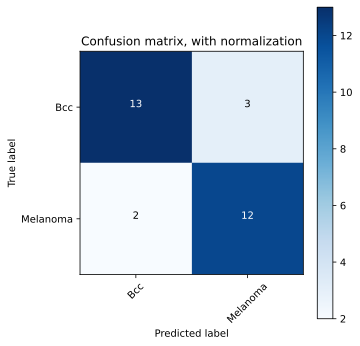

              precision    recall  f1-score   support

         Bcc       0.87      0.81      0.84        16
    Melanoma       0.80      0.86      0.83        14

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30

Deep Neural Network
confusion matrix
[[12  3]
 [ 2 13]]
sensitivity is %f 0.8571428571428571
specificity is %f 0.8125
accuracy is %f 0.8333333333333334
balanced accuracy is % 0.8348214285714286


iterate kfold :  1  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(120, 31) (30, 31)
Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 0.6798 - accuracy: 0.6083 - val_loss: 0.6134 - val_accuracy: 0.7000
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5606 - accuracy: 0.6917 - val_loss: 0.5467 - val_accuracy: 0.8000
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.

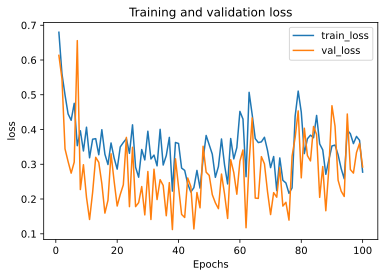

              precision    recall  f1-score   support

         Bcc       0.89      0.94      0.92        18
    Melanoma       0.91      0.83      0.87        12

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30

Deep Neural Network
confusion matrix
[[10  1]
 [ 2 17]]
sensitivity is %f 0.8333333333333334
specificity is %f 0.9444444444444444
accuracy is %f 0.9
balanced accuracy is % 0.8888888888888888


iterate kfold :  2  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(120, 31) (30, 31)
Epoch 1/100
12/12 [==============================] - 1s 17ms/step - loss: 0.7113 - accuracy: 0.4917 - val_loss: 0.6804 - val_accuracy: 0.6333
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6370 - accuracy: 0.6917 - val_loss: 0.6046 - val_accuracy: 0.7000
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.524

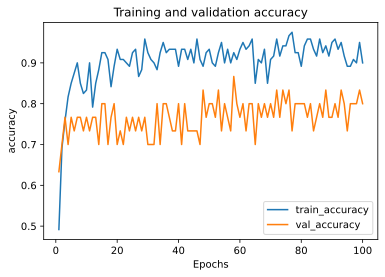

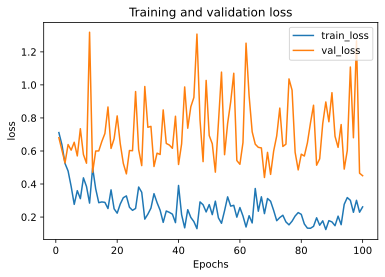

              precision    recall  f1-score   support

         Bcc       0.80      0.80      0.80        15
    Melanoma       0.80      0.80      0.80        15

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30

Deep Neural Network
confusion matrix
[[12  3]
 [ 3 12]]
sensitivity is %f 0.8
specificity is %f 0.8
accuracy is %f 0.8
balanced accuracy is % 0.8


iterate kfold :  3  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(120, 31) (30, 31)
Epoch 1/100
12/12 [==============================] - 1s 19ms/step - loss: 0.6902 - accuracy: 0.5833 - val_loss: 0.6108 - val_accuracy: 0.7000
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5053 - accuracy: 0.7500 - val_loss: 0.4659 - val_accuracy: 0.8000
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5790 - accuracy: 0.7333 - val_loss: 0.5219 - val

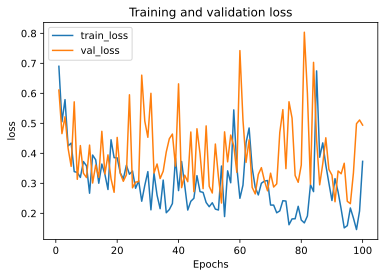

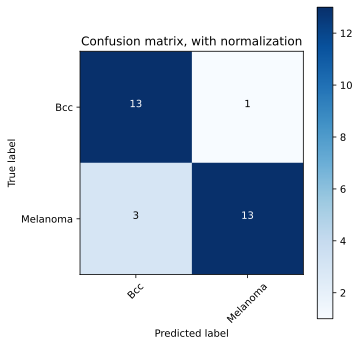

              precision    recall  f1-score   support

         Bcc       0.81      0.93      0.87        14
    Melanoma       0.93      0.81      0.87        16

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30

Deep Neural Network
confusion matrix
[[13  1]
 [ 3 13]]
sensitivity is %f 0.8125
specificity is %f 0.9285714285714286
accuracy is %f 0.8666666666666667
balanced accuracy is % 0.8705357142857143


iterate kfold :  4  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(120, 31) (30, 31)
Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 0.6986 - accuracy: 0.5833 - val_loss: 0.6545 - val_accuracy: 0.7333
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5652 - accuracy: 0.7167 - val_loss: 0.4867 - val_accuracy: 0.8000
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.

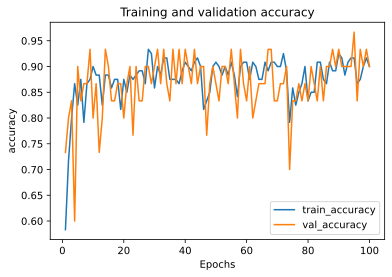

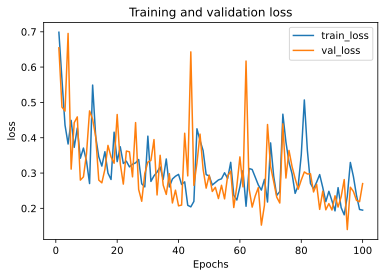

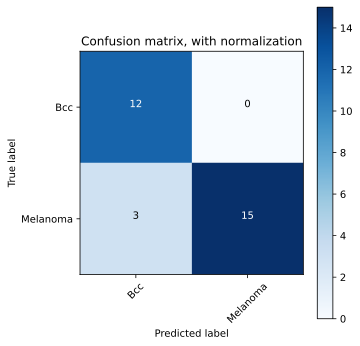

              precision    recall  f1-score   support

         Bcc       0.80      1.00      0.89        12
    Melanoma       1.00      0.83      0.91        18

    accuracy                           0.90        30
   macro avg       0.90      0.92      0.90        30
weighted avg       0.92      0.90      0.90        30

Deep Neural Network
confusion matrix
[[15  0]
 [ 3 12]]
sensitivity is %f 0.8333333333333334
specificity is %f 1.0
accuracy is %f 0.9
balanced accuracy is % 0.9166666666666667




Rata-Rata Akurasi
86.00% (+/- 3.89%)


In [49]:
from sklearn.model_selection import StratifiedKFold, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.initializers import RandomNormal, Constant
from tensorflow import keras
from tensorflow.keras import regularizers
# Model with default batch normalization
from tensorflow.keras import layers

from tensorflow.keras.initializers import RandomNormal, Constant
from numpy.random import seed
from tensorflow import random
seed(0)
random.set_seed(0)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cvscores = []
for i, (train_index, val_index) in enumerate (kfold.split(X, Y)):
# for i, (train_index, val_index) in enumerate(kfold.split(X, Y.argmax(1))):
  print('iterate kfold : ',i,' +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

  x_train_kf, x_val_kf = X[train_index], X[val_index]
  y_train_kf, y_val_kf = Y[train_index], Y[val_index]

  print(x_train_kf.shape, x_val_kf.shape)

  model =keras.Sequential()
  model.add(Dense(31, input_dim=31, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.3))


 
  # model.add(Dense(128, activation='relu'))
 
  # model.add(Dense(128, activation='relu'))
 
  # model.add(Dense(128, activation='relu'))
 





  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))

  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(256, activation='relu'))
  # model.add(Dropout(0.2))
  # # model.add(Dense(128, activation='relu'))
  # # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))



  model.add(Dense(2,activation="softmax"))
  opt = keras.optimizers.Adam(learning_rate=0.01)
  model.compile(optimizer=opt, 
                  loss='binary_crossentropy',
                  metrics = ['accuracy'])
 
#   history= model.fit(X[train_index], Y[train_index], epochs=100)
  history= model.fit(X[train_index], Y[train_index], epochs=100, batch_size=10,
                     validation_data=(X[val_index],Y[val_index]))
  
	# evaluate the model

  scores = model.evaluate(X[val_index], Y[val_index], verbose=0)

  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  print("\n")

  print('result ============================================================================================')
  plot_metric(history, 'accuracy')
  plot_metric(history, 'loss')

  # predict test data
  # y_pred=model.predict(X[val_index])
  # y_pred1=model.predict(X[train_index])

  y_pred=model.predict(x_val_kf)
  y_pred1=model.predict(x_train_kf)




  # Compute confusion matrix
  cnf_matrix = confusion_matrix(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1))
  np.set_printoptions(precision=2)

  # Plot non-normalized confusion matrix
  plot_confusion_matrix(cnf_matrix, 
                      classes=['Bcc', 'Melanoma'],
                      normalize=False,
                      title='Confusion matrix, with normalization')

  print(classification_report(y_val_kf.argmax(axis=1), 
                            y_pred.argmax(axis=1), 
                            target_names=['Bcc',   'Melanoma']))
  print('Deep Neural Network')
  display_summary(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1))
  print("\n")
  cvscores.append(scores[1] * 100)
print("\n")
print("Rata-Rata Akurasi")
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))




save_model_path = "/drive/My Drive/Moddel/modelku.h5"
model.save(save_model_path,include_optimizer=False)

# save_model_path = "/drive/My Drive/Model/model_" + str(i) + ".h5"
# model.save(save_model_path,include_optimizer=False)

In [50]:
cvscores

[83.33333134651184,
 89.99999761581421,
 80.0000011920929,
 86.66666746139526,
 89.99999761581421]

In [23]:
%cd /drive/My Drive/Moddel/

/drive/My Drive/Moddel


In [24]:
#  from sklearn import metrics
    
# recall_sensitivity = metrics.recall_score(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1), pos_label=1, average=None)
# recall_specificity = metrics.recall_score(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1), pos_label=0, average=None)
# recall_sensitivity, recall_specificity 

In [25]:
# from sklearn import metrics

# # Model Accuracy: how often is the classifier correct?
# print("Accuracy Test:",metrics.accuracy_score(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1)))
# print("Accuracy Training:",metrics.accuracy_score(y_train_kf.argmax(axis=1), y_pred1.argmax(axis=1)))

In [26]:
# disp = plot_confusion_matrix(history, x_val_kf, y_val_kf,
#                                  classes=['Bcc','Kulit Normal', 'Melanoma'],
#                                  cmap=plt.cm.Blues)
# plt.show()

In [27]:
# FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
# FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
# TP = np.diag(cnf_matrix)
# TN = cnf_matrix.sum() - (FP + FN + TP)
# FP = FP.astype(float)
# FN = FN.astype(float)
# TP = TP.astype(float)
# TN = TN.astype(float)
# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/(TP+FN)

# print(TPR)
# # Specificity or true negative rate
# TNR = TN/(TN+FP) 
# print(TNR)
# # Precision or positive predictive value
# PPV = TP/(TP+FP)
# # Negative predictive value
# NPV = TN/(TN+FN)
# # Fall out or false positive rate
# FPR = FP/(FP+TN)
# # False negative rate
# FNR = FN/(TP+FN)
# # False discovery rate
# FDR = FP/(TP+FP)
# # Overall accuracy for each class
# ACC = (TP+TN)/(TP+FP+FN+TN)

In [28]:
# report = classification_report(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1), target_names=['Bcc',  'Kulit Normal', 'Melanoma'])
# print(report)

In [29]:
# np.mean(TPR)

In [30]:


# # # Variables for average classification report
# # originalclass = []
# # predictedclass = []

# # #Make our customer score
# # def classification_report_with_accuracy_score(y_true, y_pred):
# #     originalclass.extend(y_true)
# #     predictedclass.extend(y_pred)
# #     return accuracy_score(y_true, y_pred) # return accuracy score

# # inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
# # outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)

# # # Non_nested parameter search and scoring
# # clf = GridSearchCV(estimator=svr, param_grid=p_grid, cv=inner_cv)

# # # Nested CV with parameter optimization
# # nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

# # # Average values in classification report for all folds in a K-fold Cross-validation  
# # print(classification_report(originalclass, predictedclass)) 

# from sklearn.model_selection._validation import cross_val_score
# from sklearn.metrics import classification_report, accuracy_score, make_scorer
# originalclass = []
# predictedclass = []

# def classification_report_with_accuracy_score(y_val_kf, y_pred):
#     originalclass.extend(y_val_kf)
#     predictedclass.extend(y_pred)
#     return accuracy_score(y_val_kf, y_pred) # return accuracy score

# inner_cv = StratifiedKFold(n_splits=10)
# outer_cv = StratifiedKFold(n_splits=10)

# # Nested CV with parameter optimization
# nested_score = cross_val_score(history, X, Y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

# # Average values in classification report for all folds in a K-fold Cross-validation  
# print(classification_report(originalclass, predictedclass)) 

In [31]:

# #def defines a function for calculating the confusion matrix
# # calculate a confusion matrix
# def confusion_matrix(actual, predicted):
# 	unique = set(actual)
# 	matrix = [list() for x in range(len(unique))]
# 	for i in range(len(unique)):
# 		matrix[i] = [0 for x in range(len(unique))]
# 	lookup = dict()
# 	for i, value in enumerate(unique):
# 		lookup[value] = i
# 	for i in range(len(actual)):
# 		x = lookup[actual[i]]
# 		y = lookup[predicted[i]]
# 		matrix[y][x] += 1
# 	return unique, matrix
 
# # pretty print a confusion matrix
# def print_confusion_matrix(unique, matrix):
# 	print('(A)' + ' '.join(str(x) for x in unique))
# 	print('(P)-------')
# 	for i, x in enumerate(unique):
# 		print("%s| %s" % (x, ' '.join(str(x) for x in matrix[i])))

In [32]:
# # Test confusion matrix for the Evaluate results
# unique, matrix = confusion_matrix(Y, rounded)
# print_confusion_matrix(unique, matrix)